In [2]:
# Importing all the Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab

11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [3]:
# Loading the Dataset
df = pd.read_csv('trainKNN.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.columns = ['Id number', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass']

In [5]:
# Basic statistical description of the dataset
df.describe()

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [6]:
# Checking is there any null values in the dataset
df.isnull().sum()
# There is no null value in the Dataset

Id number           0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

In [7]:
# finding the shape of the dataframe
df.shape

(196, 11)

In [8]:
df.head()

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
df.drop('Id number', axis=1, inplace=True)

In [10]:
df.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


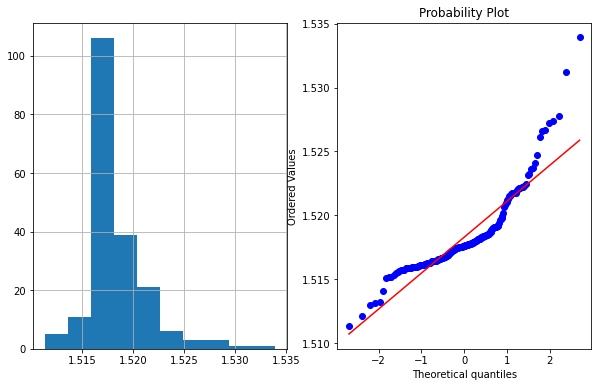

In [11]:
# 'refractive index' follows the normal distribution
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'refractive index')

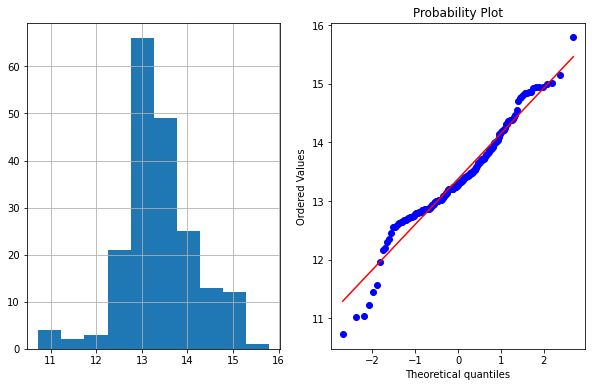

In [12]:
plot_data(df,'Sodium')

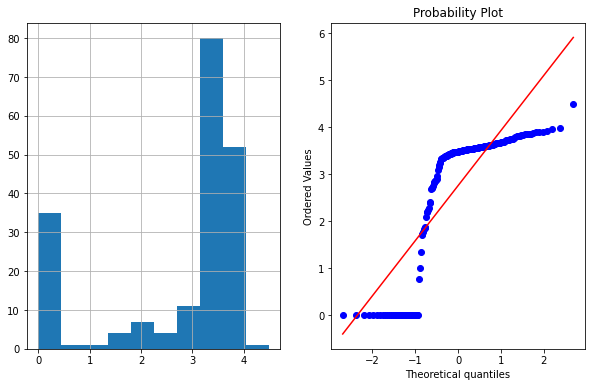

In [13]:
# 'magnesium' not following the normal distribution so we try to apply any transformation
plot_data(df,'Magnesium')

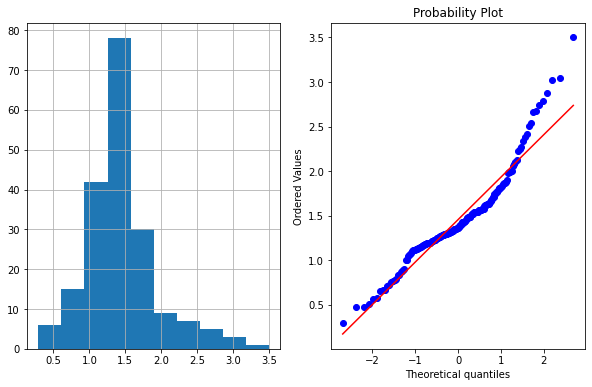

In [14]:
# Aluminium following the normal distribution
plot_data(df,'Aluminum')

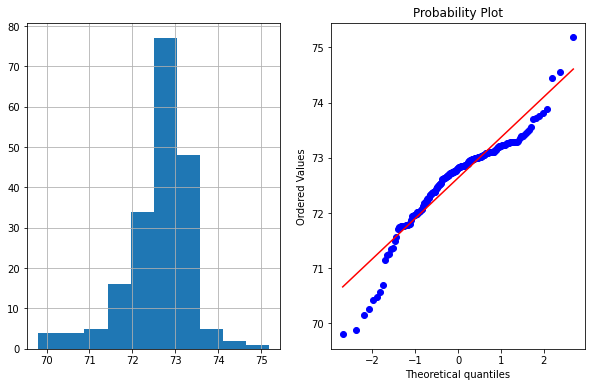

In [15]:
# Silicon left skewed distribution
plot_data(df,'Silicon')

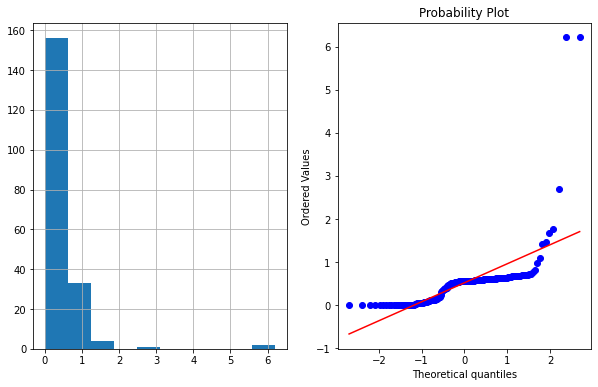

In [16]:
plot_data(df,'Potassium')

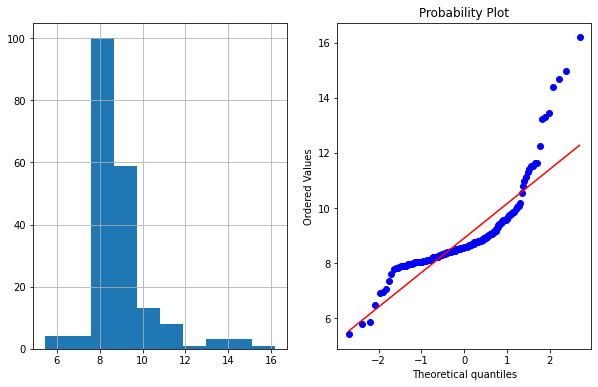

In [17]:
plot_data(df,'Calcium')

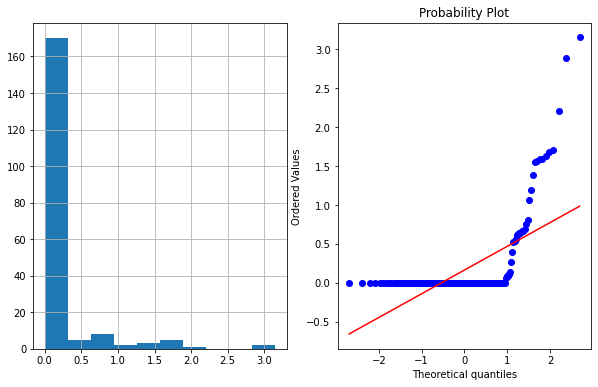

In [18]:
plot_data(df,'Barium')

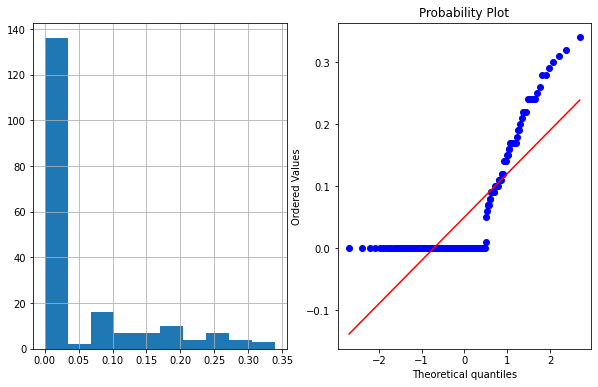

In [19]:
plot_data(df,'Iron')

<AxesSubplot:>

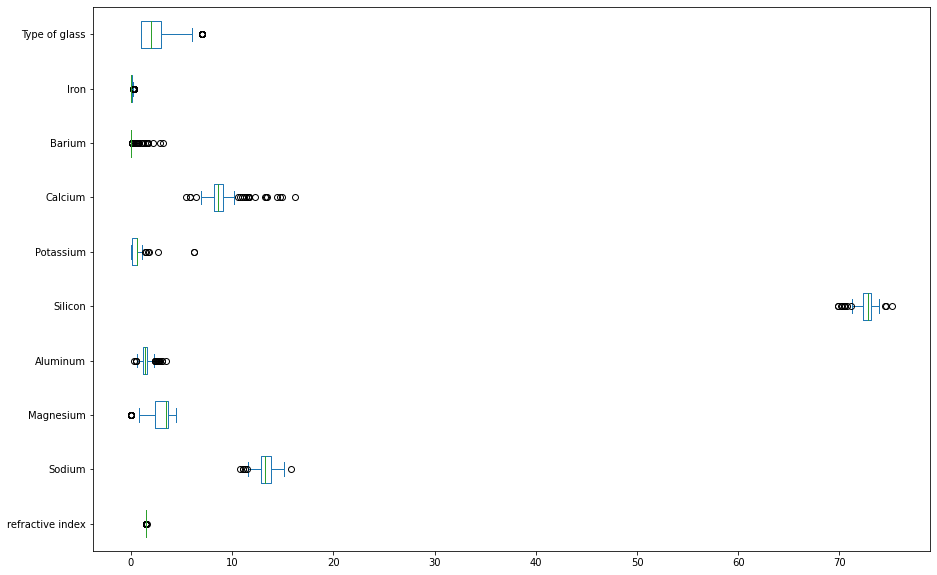

In [29]:
#Plotting 'Box Plot' to find outliers
df.plot(kind='box',vert=False, figsize=(15, 10))

<AxesSubplot:>

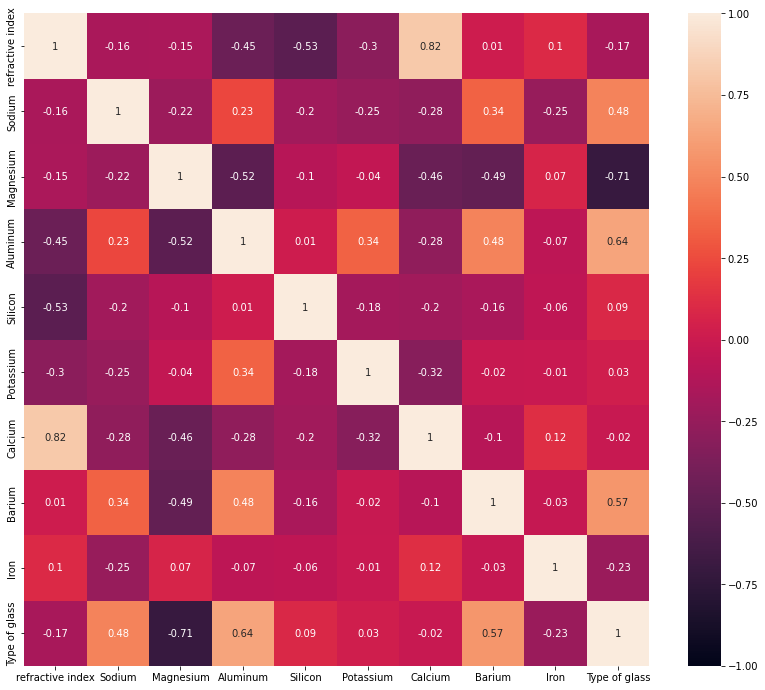

In [30]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, annot = True)

In [32]:
df1 = df.copy()
correlated_features = set()
correlation_matrix = df1.drop('Type of glass', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'Calcium'}

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


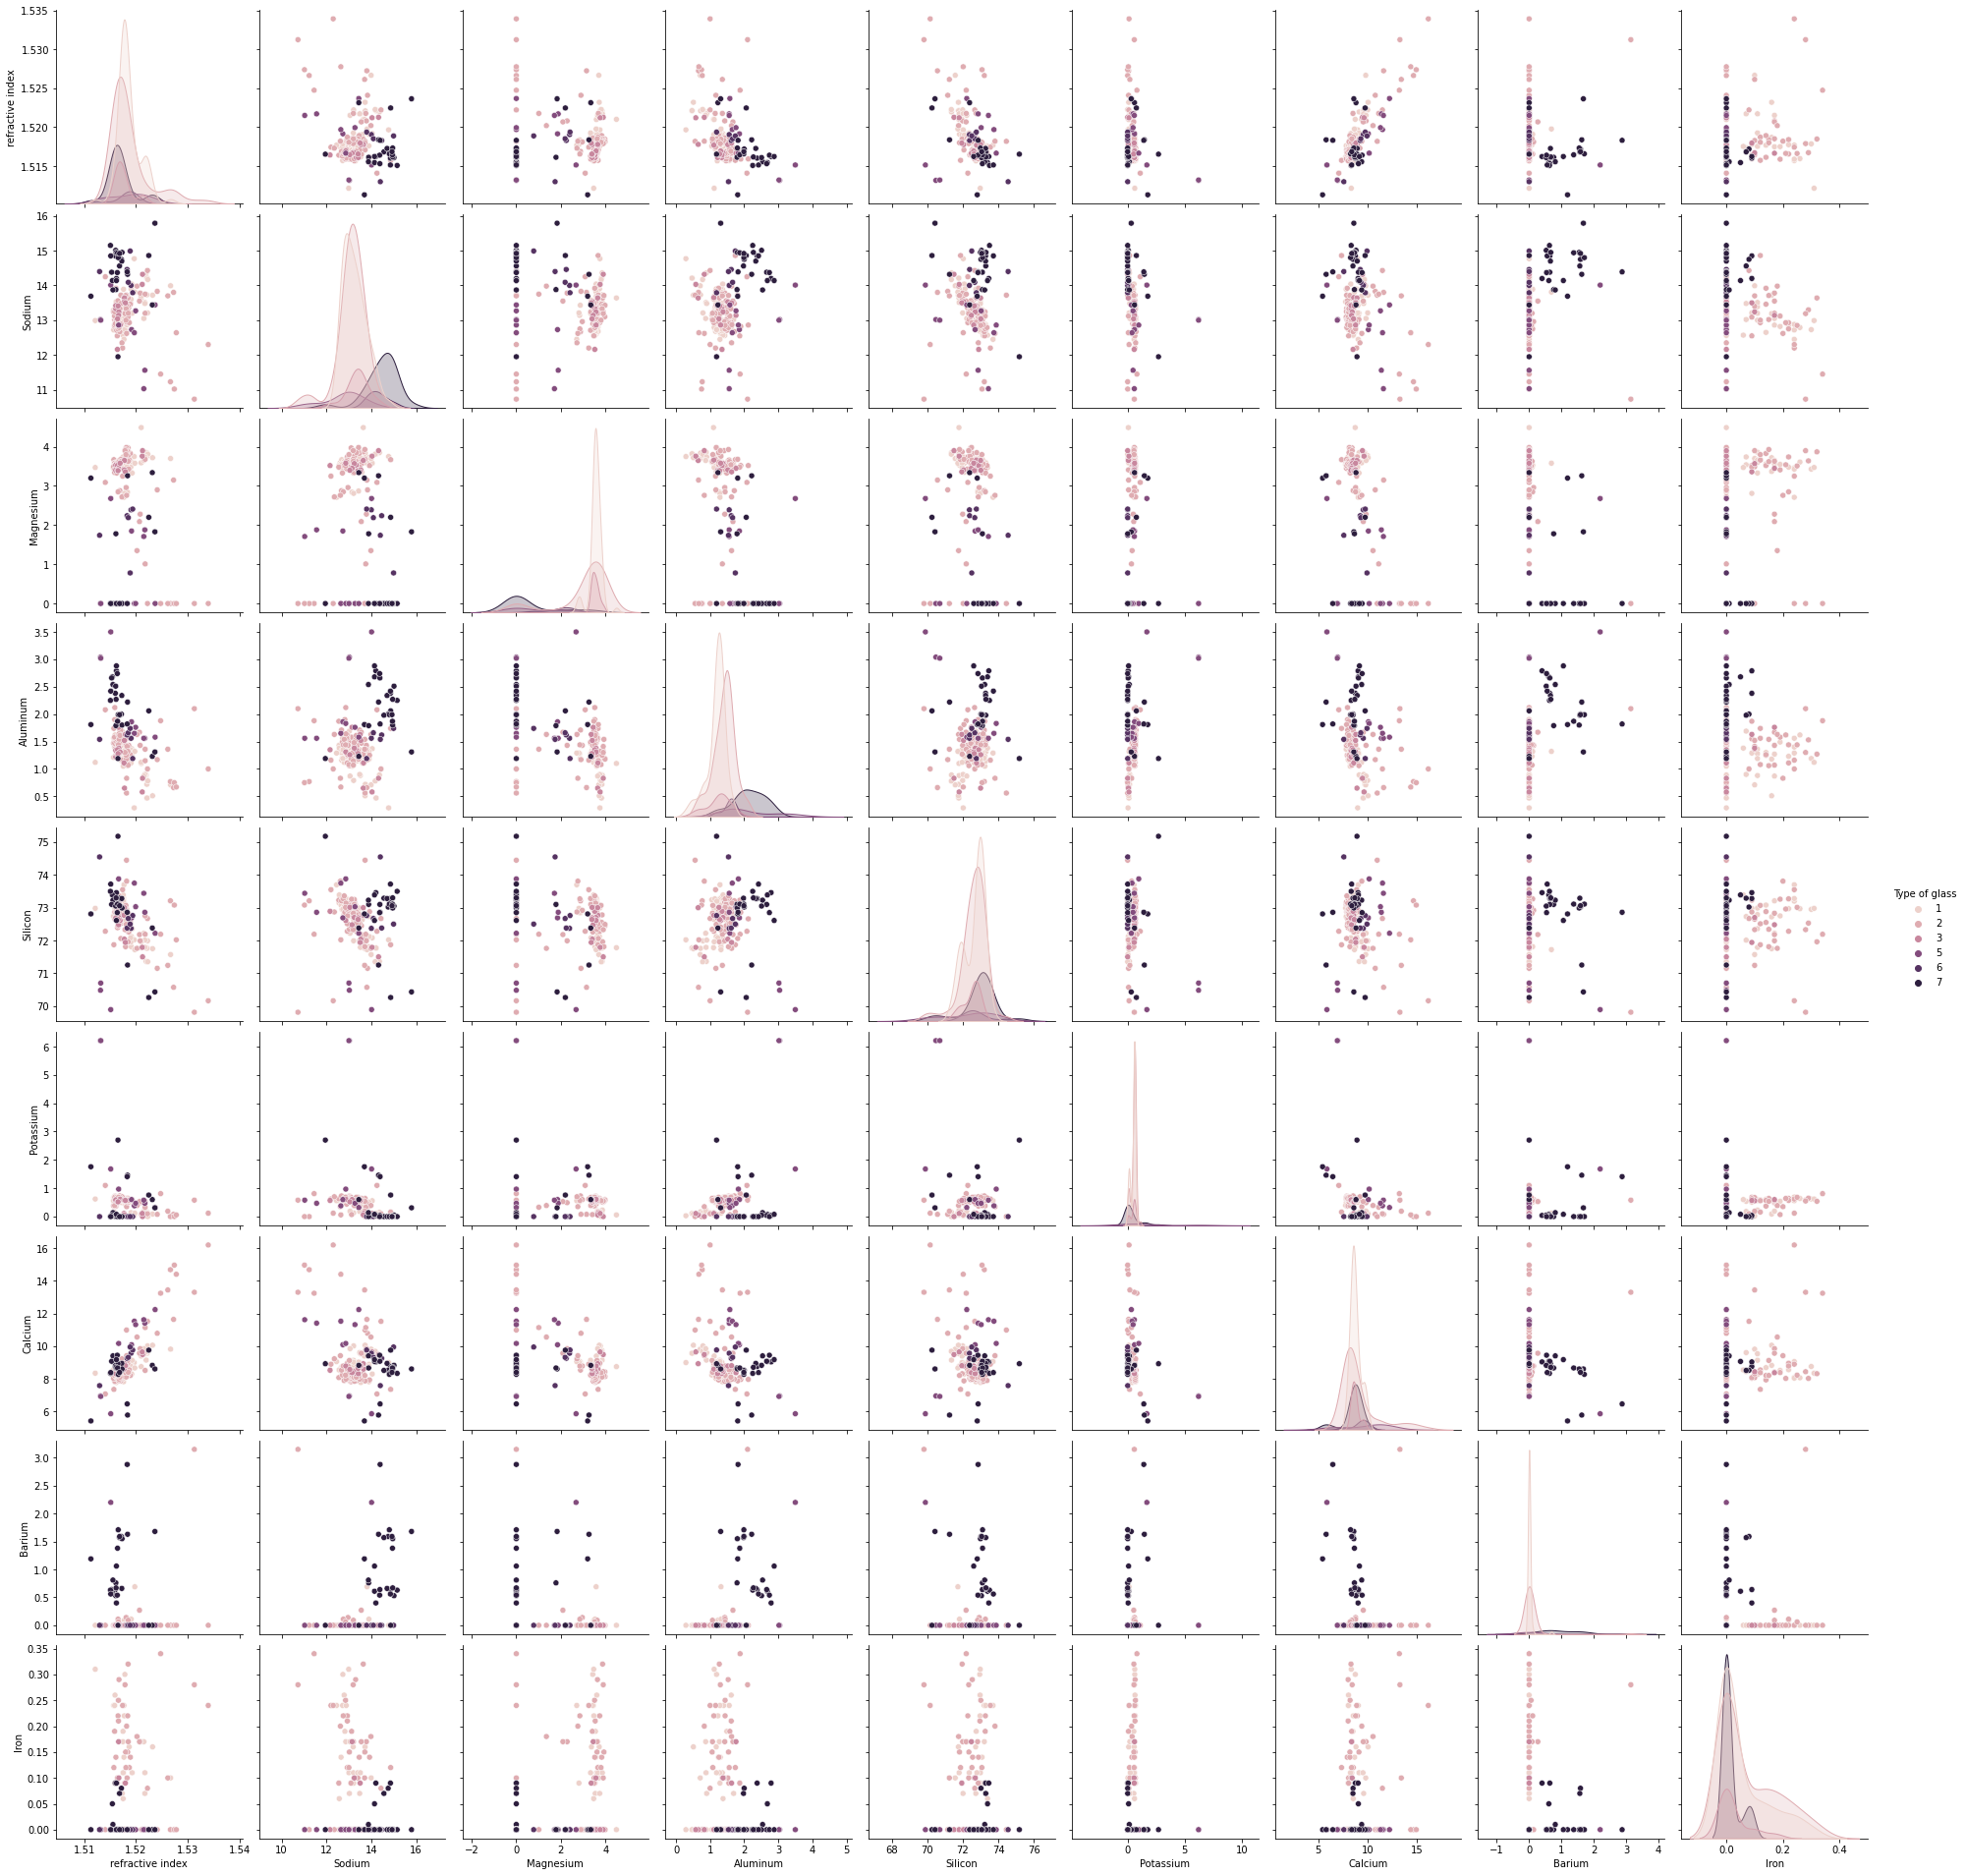

In [34]:
# Performing Multivariate analysis
sns.pairplot(df,hue="Type of glass",size=3)

# Euclidien Distance Model Building

In [36]:
# Splitting the Dataset into x, and y
X = df.drop('Type of glass', axis=1)
y = df['Type of glass']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = scaler.fit_transform(X)

# Selecting the K Value

In [85]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    score=cross_val_score(knn,scaler1,y,cv=10)
    accuracy_rate.append(score.mean())

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least po

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least po

Text(0, 0.5, 'Accuracy Rate')

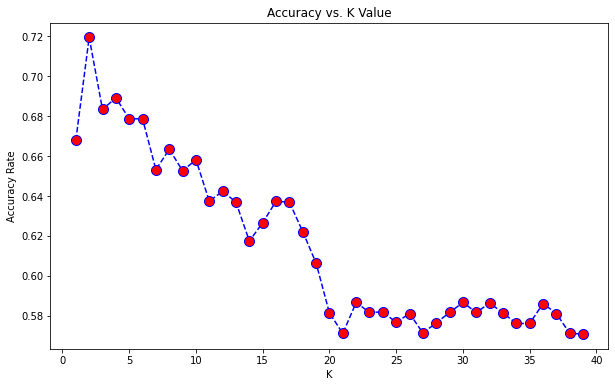

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [87]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(scaler1, y)

In [88]:
test = pd.read_csv('testKNN.txt', header=None)

In [89]:
test.columns = ['Id number', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass']

In [90]:
test.drop('Id number', axis=1, inplace=True)

In [91]:
test_x = df.drop('Type of glass', axis=1)
test_y = df['Type of glass']

In [92]:
scaler_test1 = scaler.transform(test_x)

In [93]:
prediction_1 = neigh.predict(scaler_test1)

In [94]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction_1))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85        67
           2       0.91      0.88      0.90        73
           3       0.67      0.29      0.40        14
           5       0.80      0.80      0.80        10
           6       1.00      0.83      0.91         6
           7       0.96      0.88      0.92        26

    accuracy                           0.85       196
   macro avg       0.85      0.77      0.80       196
weighted avg       0.85      0.85      0.84       196



# Manhattan Distance Model Building

## Selecting The K Value

In [95]:
from sklearn.model_selection import cross_val_score
accuracy_rate1 = []

# Will take some time
for i in range(1,40):
    
    knn1 = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    score1=cross_val_score(knn1,scaler1,y,cv=10)
    accuracy_rate1.append(score1.mean())

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least po

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least po

Text(0, 0.5, 'Accuracy Rate')

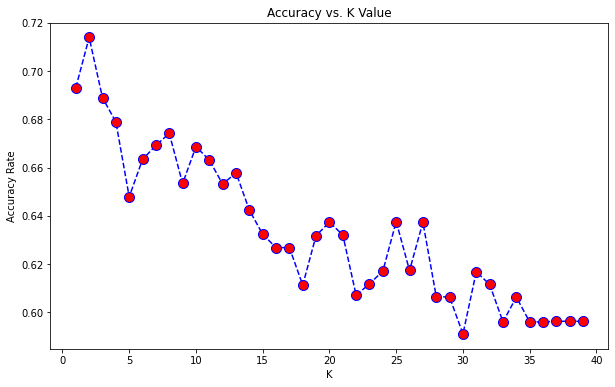

In [96]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [97]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=3, metric='manhattan').fit(scaler1, y)

In [99]:
predictions2 = neigh1.predict(scaler_test1)

In [101]:
# Classification Report
print(classification_report(test_y, predictions2))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85        67
           2       0.94      0.88      0.91        73
           3       0.62      0.36      0.45        14
           5       0.80      0.80      0.80        10
           6       1.00      0.83      0.91         6
           7       0.96      0.88      0.92        26

    accuracy                           0.86       196
   macro avg       0.85      0.78      0.81       196
weighted avg       0.86      0.86      0.85       196



# Conclusion

In [ ]:
### 1. Eucli